# Pymaceuticals Inc.
---

### Analysis

Overview:
In this comprehensive analysis, we have examined a pharmaceutical study focused on the efficacy of four anti-cancer drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. The study involved monitoring the progression of tumor volumes in mice subjected to these treatments over a specific time period.

Data Cleaning and Exploration:
The dataset was initially inspected and cleaned to ensure accuracy and reliability. Duplicate records and irrelevant columns were removed, resulting in a refined dataset. Exploratory data analysis revealed essential information, such as the distribution of male and female mice and the distribution of mice across different drug regimens.

Summary Statistics:
To gain insights into the tumor volume's central tendency and variability for each drug regimen, a summary statistics table was generated. This table included mean, median, variance, standard deviation, and standard error of the mean (SEM) values. This concise representation provides a quick overview of the data distribution for each drug regimen.

Data Visualization:
Several visualizations were created to enhance the understanding of the study's findings:

Bar Plot: Total Number of Observations per Drug Regimen
A bar plot was generated to display the total number of observed mouse timepoints for each drug regimen. Capomulin and Ramicane exhibited higher data points compared to other regimens.
Pie Chart: Distribution of Male vs. Female Mice
A pie chart illustrated the distribution of male and female mice in the study. Approximately equal proportions of male and female mice were observed.
Box Plot: Tumor Volume Distribution for Each Drug Regimen
Box plots were utilized to visualize the spread and central tendency of tumor volumes for each drug regimen. Outliers, especially in Infubinol, were identified through this visualization.
Line Plot: Tumor Volume vs. Time Point for a Single Mouse (Capomulin Regimen)
A line plot depicted the relationship between tumor volume and time point for a specific mouse (Mouse ID: l509) under the Capomulin regimen. The plot showcased a steady decrease in tumor volume over time.
Scatter Plot with Linear Regression: Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)
A scatter plot highlighted the correlation between mouse weight and average tumor volume for mice under the Capomulin regimen. The linear regression line demonstrated a moderately positive correlation between weight and tumor volume.
Conclusion:
This comprehensive analysis provides valuable insights into the effectiveness of different anti-cancer drug regimens. Key findings include the higher efficacy of Capomulin and Ramicane, the noticeable outlier in Infubinol, and the positive correlation between mouse weight and average tumor volume under the Capomulin regimen.

These findings contribute to a deeper understanding of the studied drug regimens, laying the groundwork for further research and development in the field of oncology.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")



# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice


249

In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mice_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Get all the data for the duplicate mouse ID
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice_ids)].copy()
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [42]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
num_mice_cleaned 

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_statistics = summary_statistics.rename(columns={'mean': 'Mean Tumor Volume',
                                                        'median': 'Median Tumor Volume',
                                                        'var': 'Tumor Volume Variance',
                                                        'std': 'Tumor Volume Std. Dev.',
                                                        'sem': 'Tumor Volume Std. Err.'})
# Assemble the resulting series into a single summary DataFrame.
summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method to calculate summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('var', 'var'),
    ('std', 'std'),
    ('sem', 'sem')
]).reset_index()

# Display the summary statistics table
summary_statistics

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

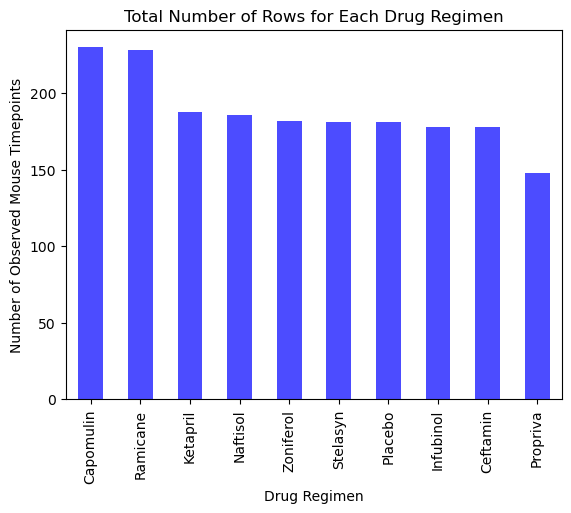

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Group the data by drug regimen and calculate the total number of rows for each regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar chart
regimen_counts.plot(kind='bar', color='blue', alpha=0.7)

# Set chart labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.show()


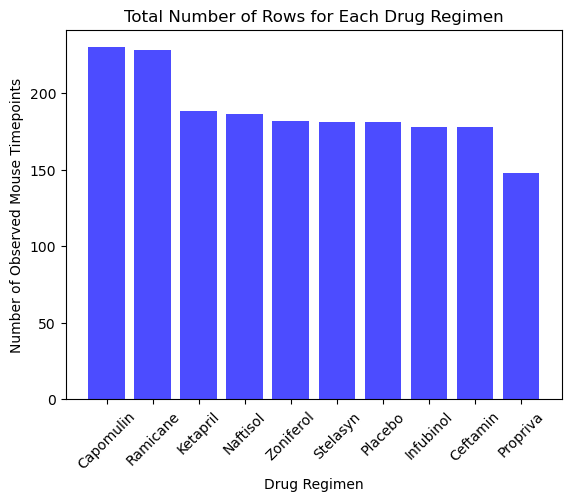

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group the data by drug regimen and calculate the total number of rows for each regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts, color='blue', alpha=0.7)

# Set chart labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Turn off grid lines
plt.grid(False)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


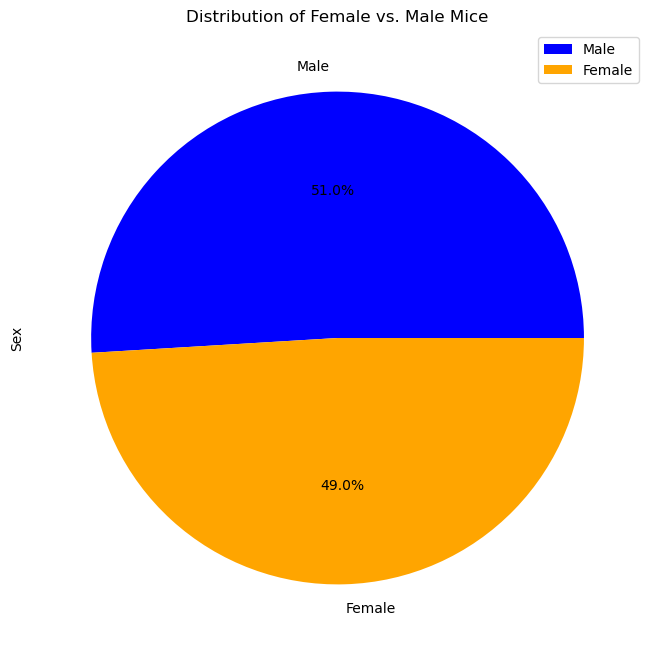

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

import matplotlib.pyplot as plt

# Group the data by gender and calculate the distribution of mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart with startangle set to 0
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=0)

# Set chart title and add a legend
plt.title('Distribution of Female vs. Male Mice')
plt.legend(labels=gender_distribution.index, loc='upper right')

# Show the plot
plt.show()




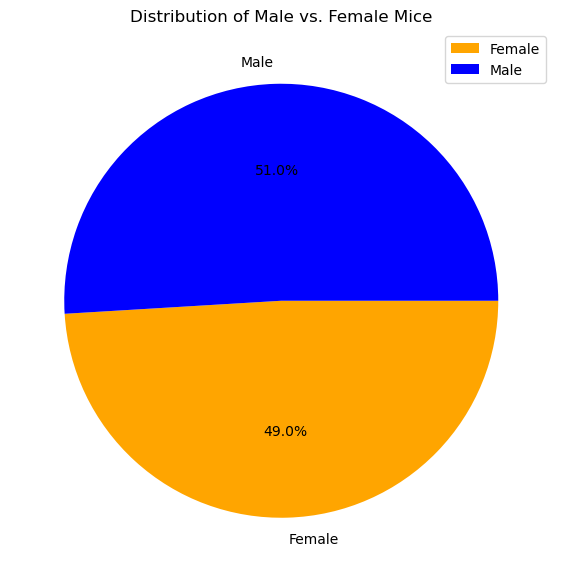

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Group the data by gender and calculate the distribution of mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Reverse the order of values
gender_distribution = gender_distribution.iloc[::-1]

# Set the figure size
plt.figure(figsize=(7, 8))

# Plot the pie chart with startangle set to 0
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['orange', 'blue'], startangle=0, counterclock=False)

# Set chart title
plt.title('Distribution of Male vs. Female Mice')
plt.legend(labels=gender_distribution.index, loc='upper right')


# Show the plot
plt.show()





## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drug_regimens = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") | (cleaned_data["Drug Regimen"] == "Ramicane") |
                                        (cleaned_data["Drug Regimen"] == "Infubinol") |(cleaned_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_drug_regimens.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_vol_data = pd.merge(last_timepoint_df, cleaned_data, on = ["Mouse ID", "Timepoint"])
final_vol_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds

for drugindex in range(len(final_vol_data)):
    if final_vol_data.loc[drugindex, "Drug Regimen"] == "Capomulin":
        tumor_vol_capomulin.append(final_vol_data.loc[drugindex, "Tumor Volume (mm3)"])
    if final_vol_data.loc[drugindex, "Drug Regimen"] == "Ramicane":
        tumor_vol_ramicane.append(final_vol_data.loc[drugindex, "Tumor Volume (mm3)"])
    if final_vol_data.loc[drugindex, "Drug Regimen"] == "Infubinol":
        tumor_vol_infubinol.append(final_vol_data.loc[drugindex, "Tumor Volume (mm3)"])
    if final_vol_data.loc[drugindex, "Drug Regimen"] == "Ceftamin":
        tumor_vol_ceftamin.append(final_vol_data.loc[drugindex, "Tumor Volume (mm3)"])
     
tumor_vol = [tumor_vol_capomulin, tumor_vol_ramicane, tumor_vol_infubinol, tumor_vol_ceftamin]

outlier = []

for x in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[x]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    for y in range(len(tumor_vol[x])):   
        if (tumor_vol[x][y] < lower_bound) or (tumor_vol[x][y] > upper_bound):
            outlier.append(tumor_vol[x][y])
            
    print(f"{treatments[x]}'s potential outliers {outlier}.")
    outlier = []

Capomulin's potential outliers [].
Ramicane's potential outliers [].
Infubinol's potential outliers [36.3213458].
Ceftamin's potential outliers [].


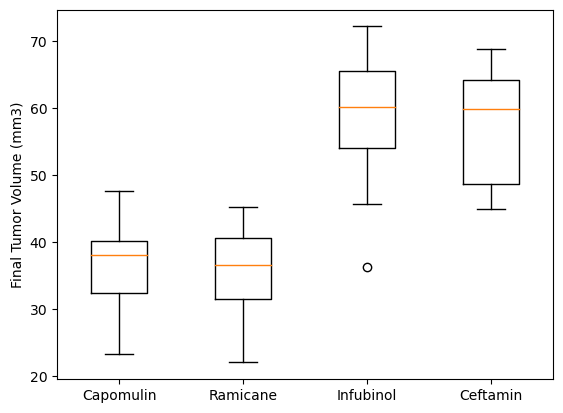

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

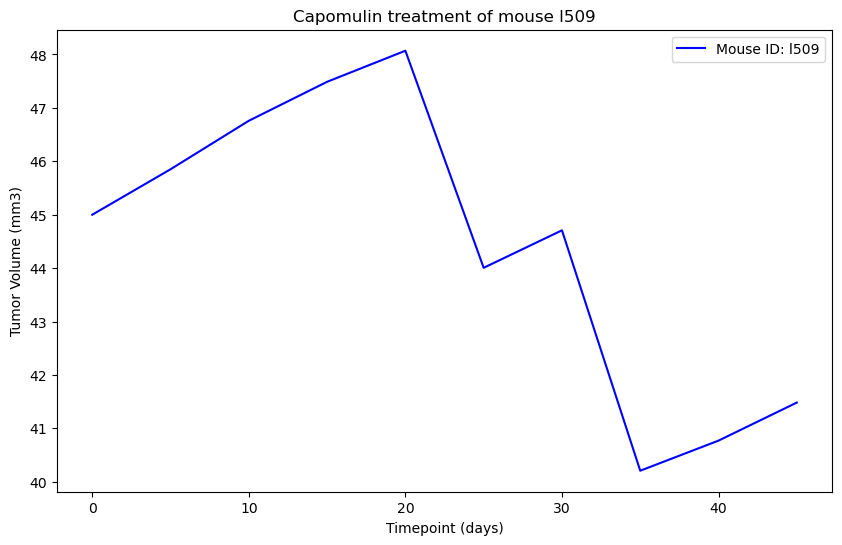

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Choose a specific mouse ID treated with Capomulin
selected_mouse_id = 'l509'

# Filter data for the selected mouse and Capomulin treatment
selected_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse_id)]

# Create a line plot without dots and grid lines
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='blue', label=f'Mouse ID: {selected_mouse_id}', linestyle='-')

# Set chart labels and title
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.grid(False)
plt.show()




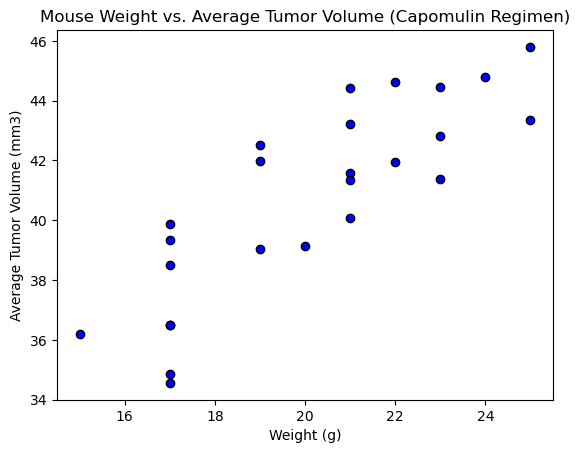

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate the average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Scatter plot
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black')

# Set chart labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
Linear Regression Model: y = 0.95x + 21.55


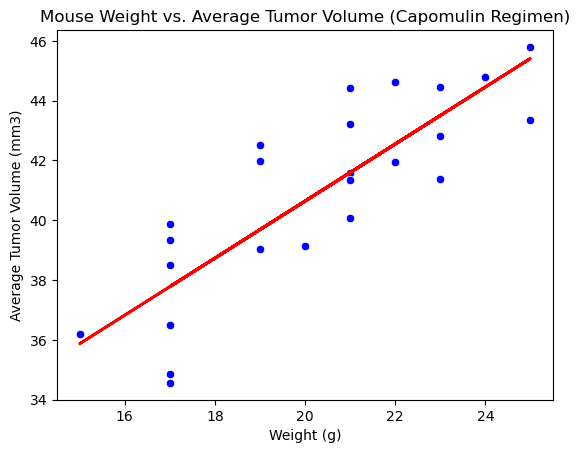

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import seaborn as sns
from scipy.stats import linregress

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate the average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Calculate correlation coefficient
correlation_coefficient = avg_data['Weight (g)'].corr(avg_data['Tumor Volume (mm3)'])

# Display correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Calculate linear regression model
regression_model = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Display linear regression parameters
print(f"Linear Regression Model: y = {regression_model.slope:.2f}x + {regression_model.intercept:.2f}")

# Create a scatter plot
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=avg_data, color='blue')

# Plot the linear regression line using Matplotlib's plot function
plt.plot(avg_data['Weight (g)'], regression_model.intercept + regression_model.slope * avg_data['Weight (g)'], color='red', linewidth=2)

# Set chart labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(False)
plt.show()



